In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten 

# To analyse the data , we use tensorboard 
from tensorflow.keras.callbacks import TensorBoard

# We are going to do convolution and max pooling 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time 


2024-03-19 01:05:18.724375: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-19 01:05:18.725853: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 01:05:18.792649: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 01:05:19.063448: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 01:05:19.969419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Loading the dataset - CIFAR 10

(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()


In [17]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

# training set has 50000 images and test has 10000
print(x_train[0].shape)

print(y_test)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(32, 32, 3)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


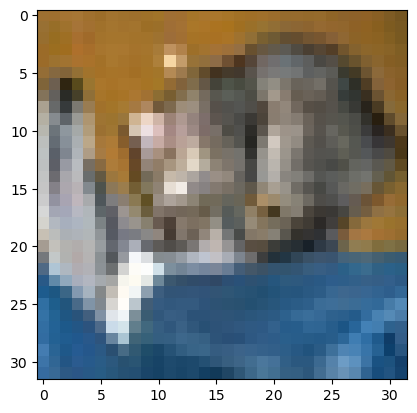

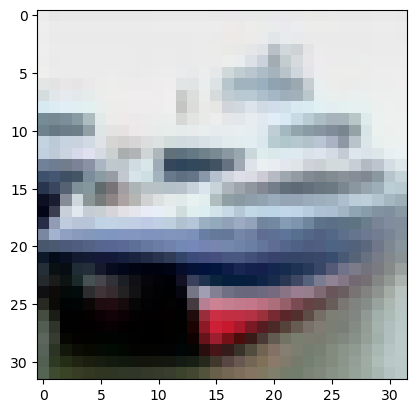

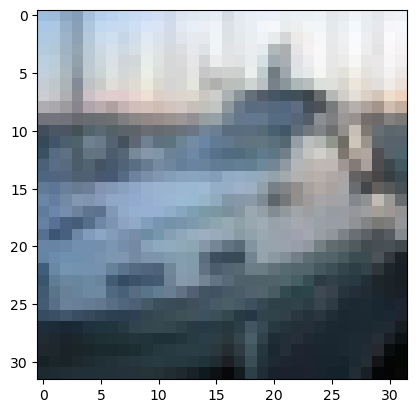

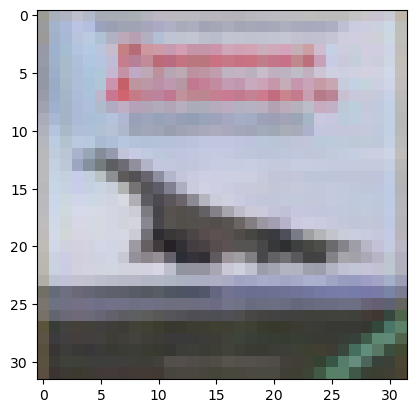

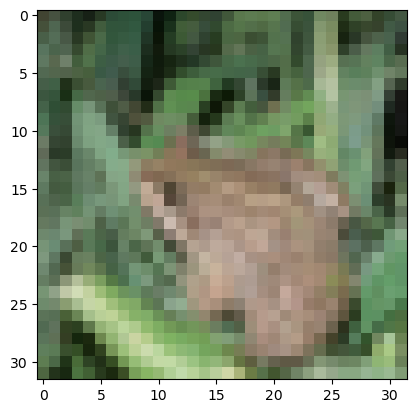

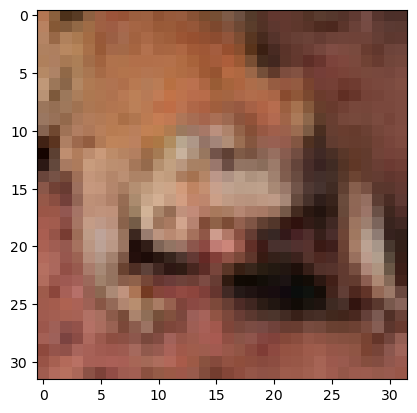

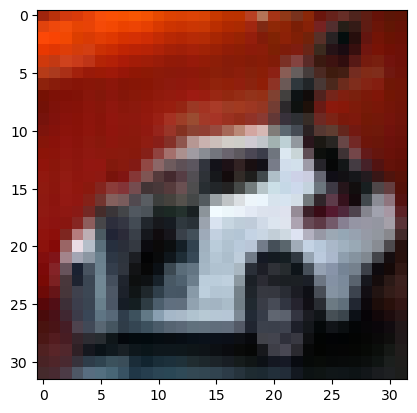

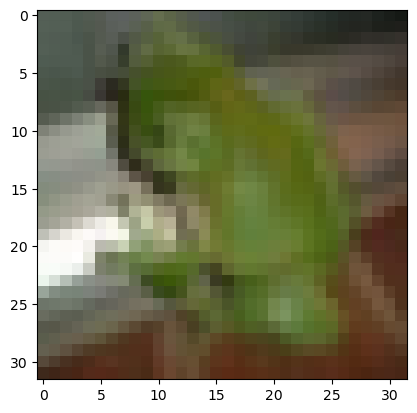

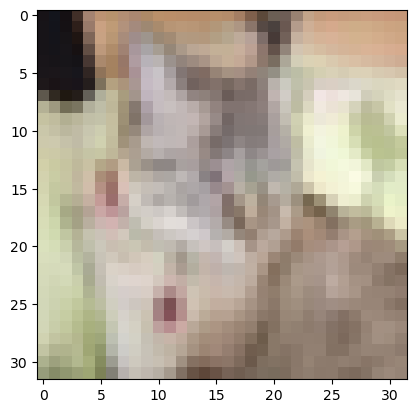

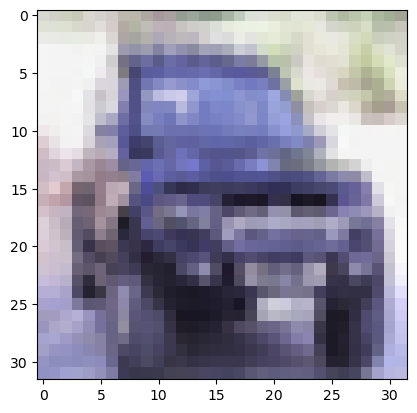

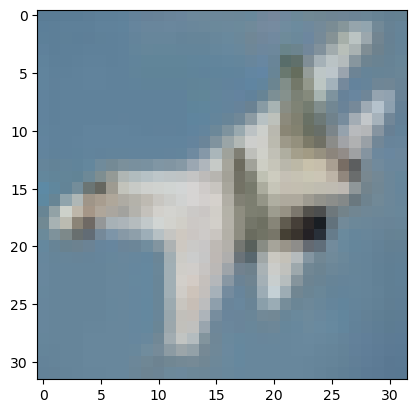

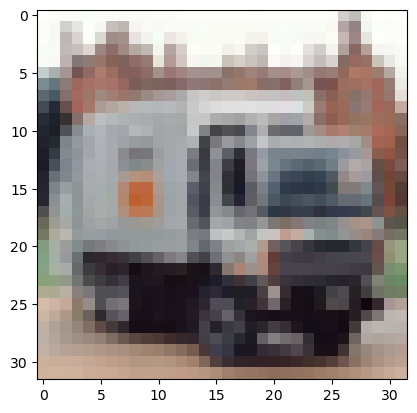

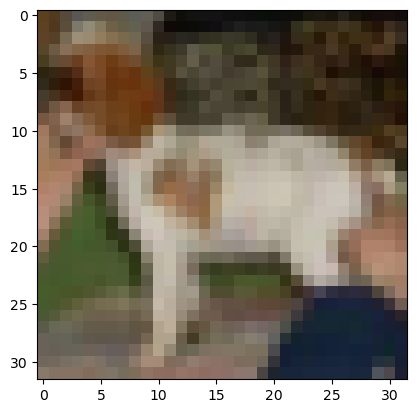

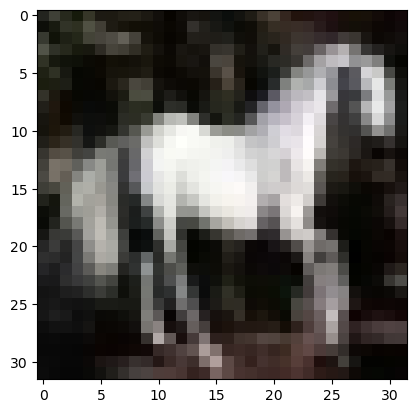

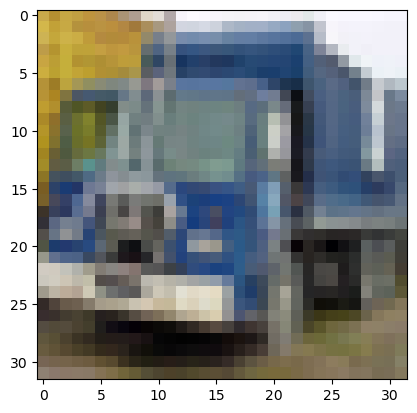

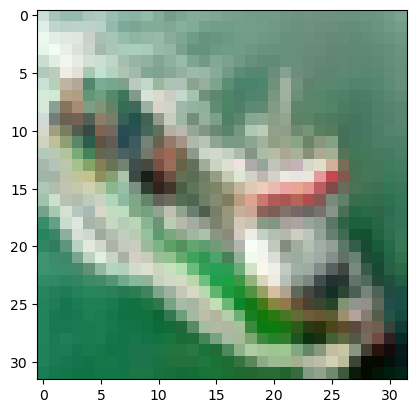

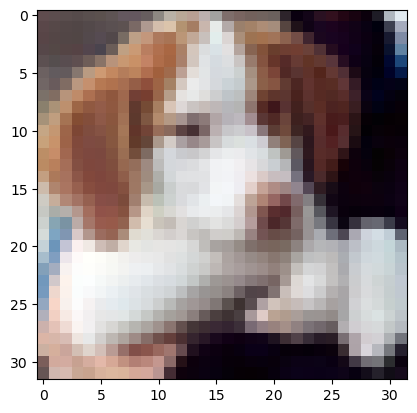

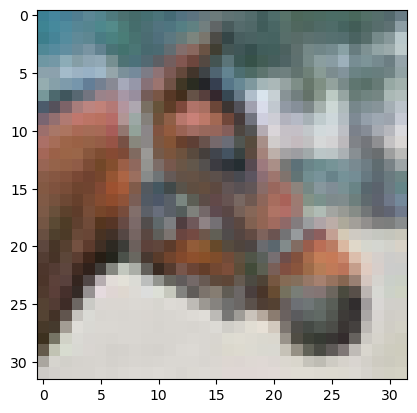

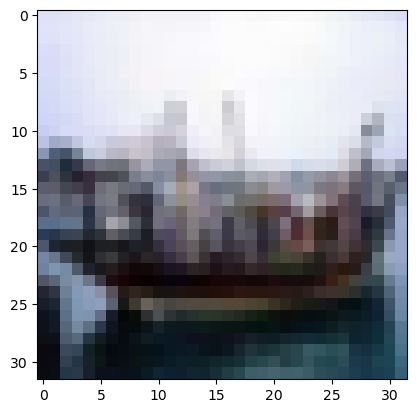

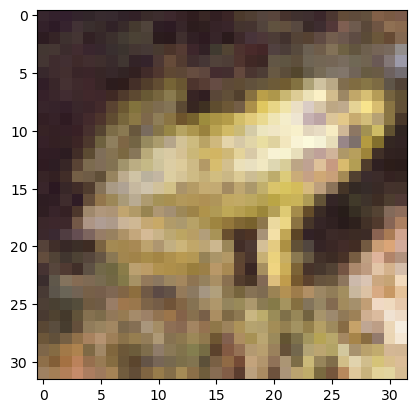

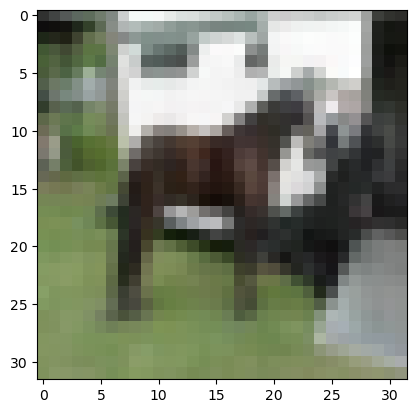

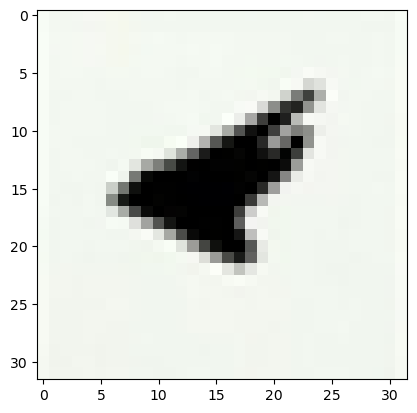

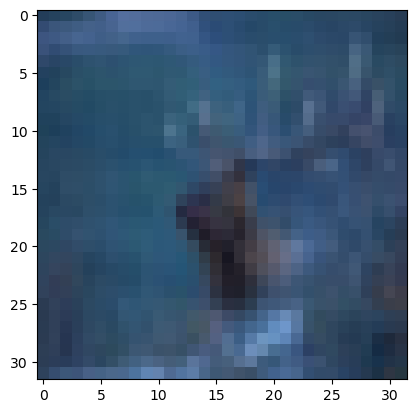

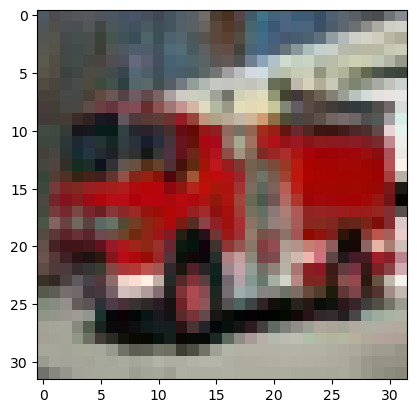

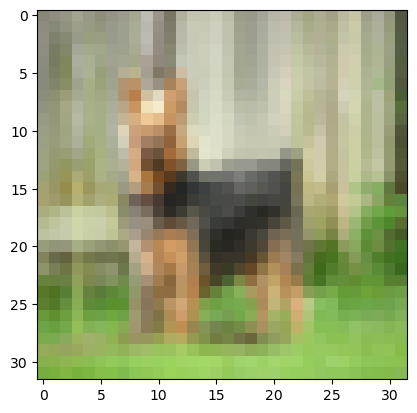

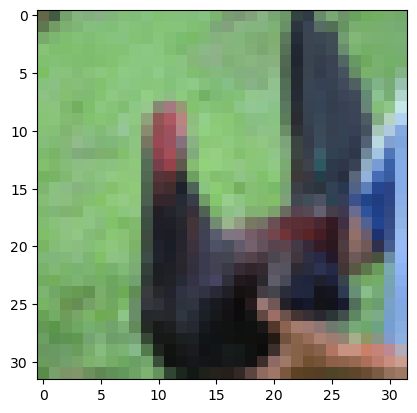

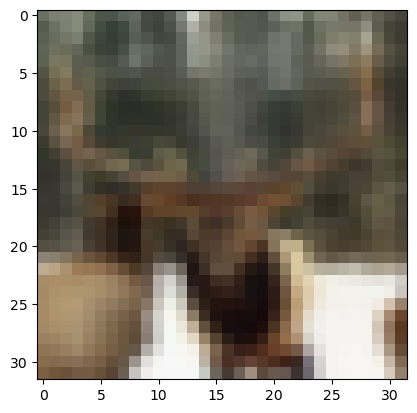

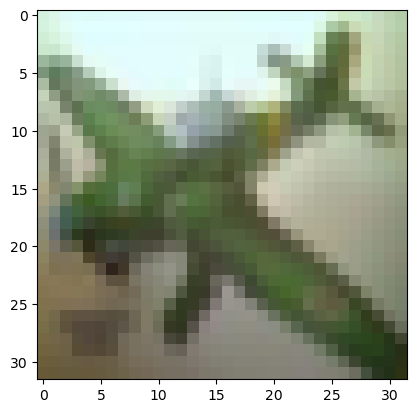

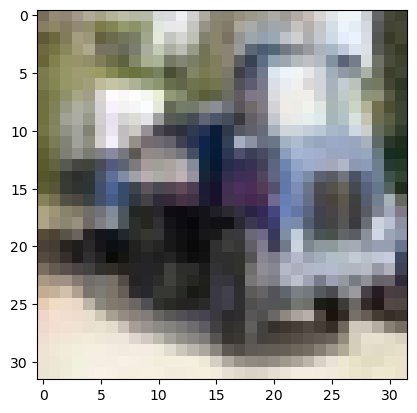

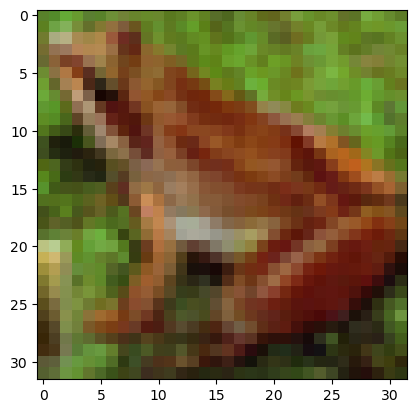

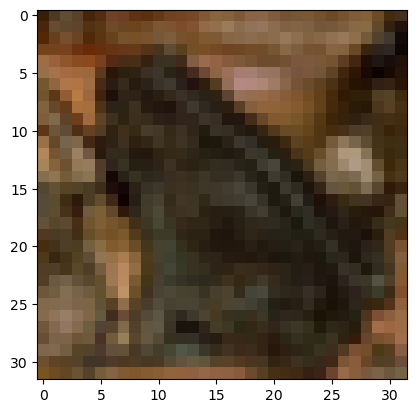

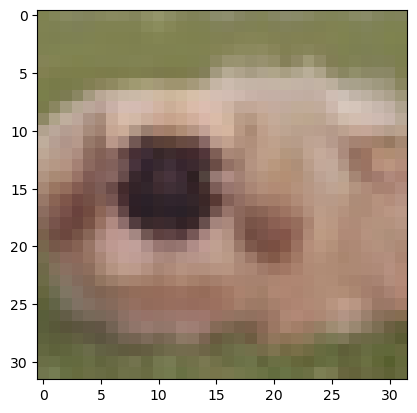

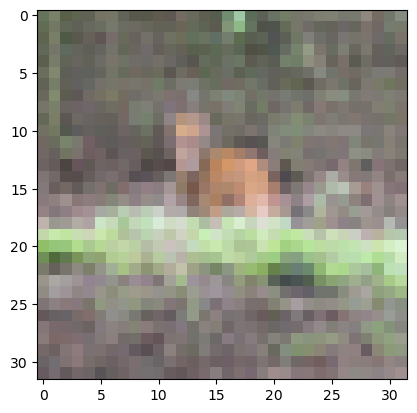

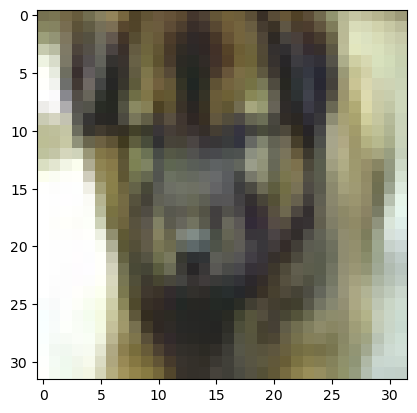

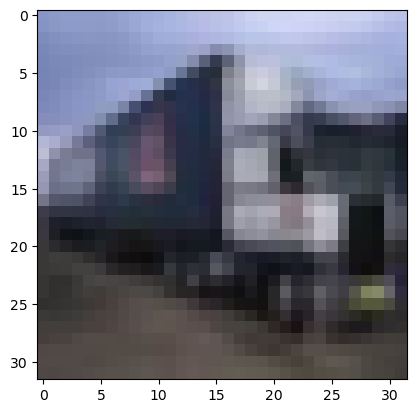

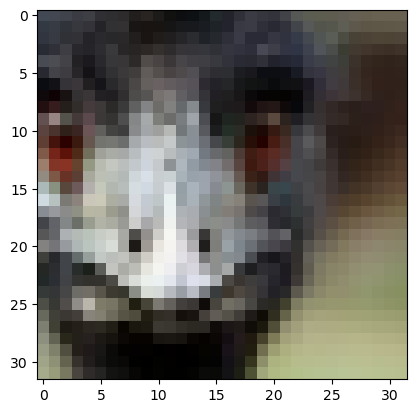

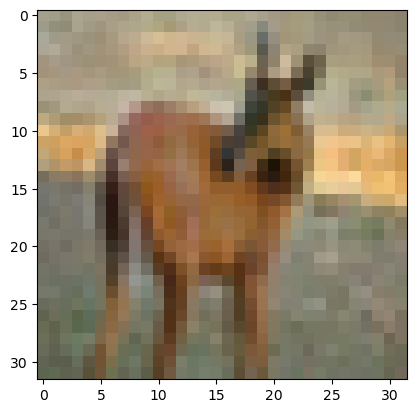

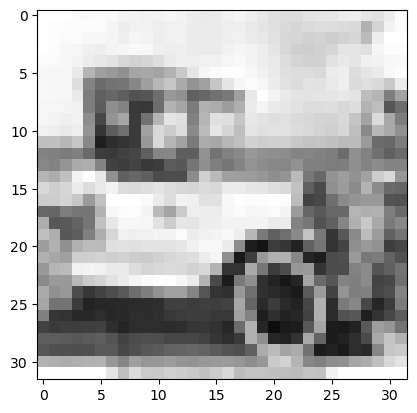

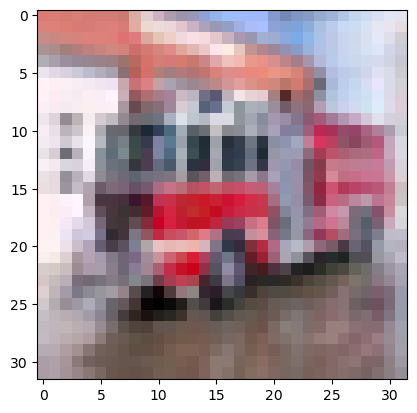

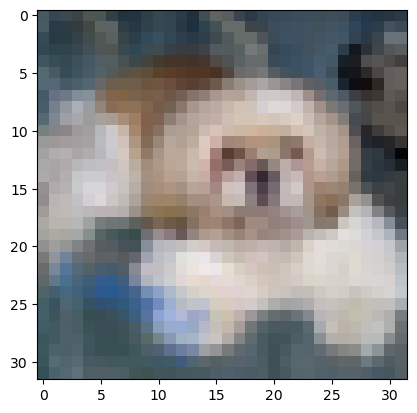

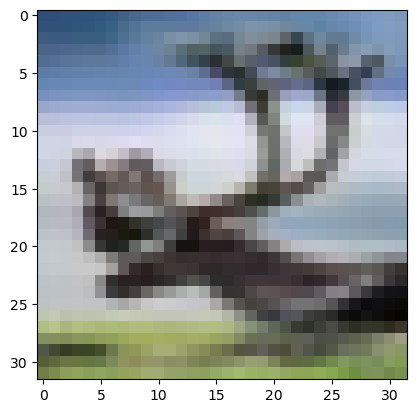

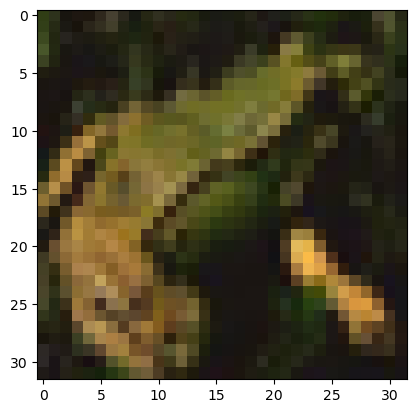

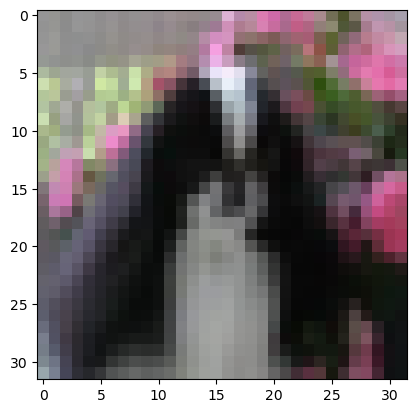

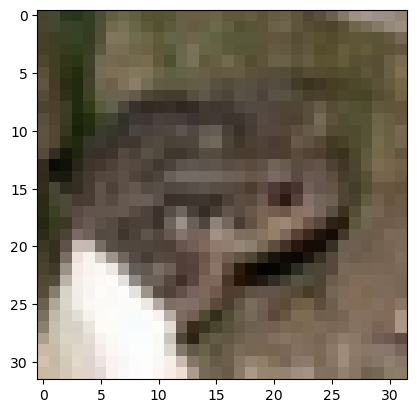

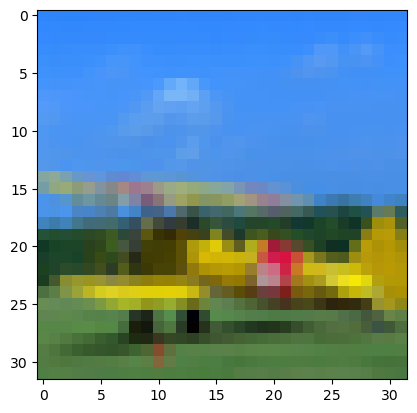

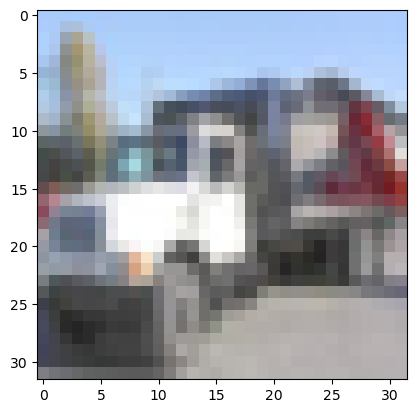

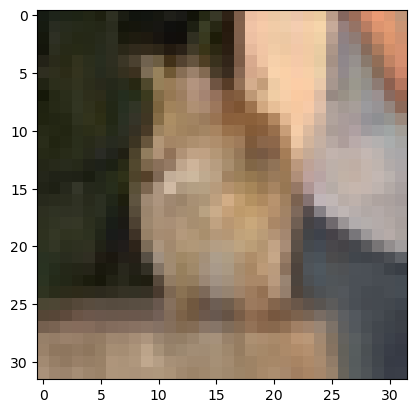

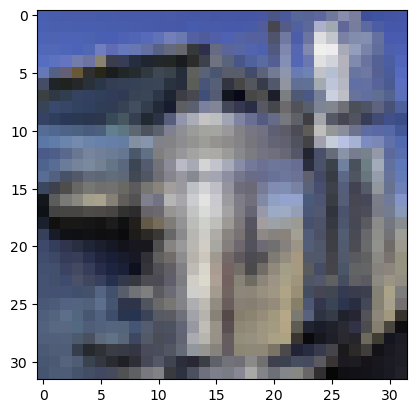

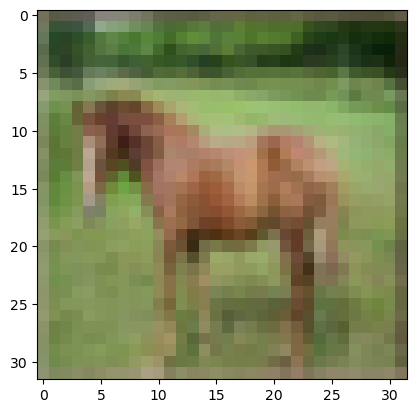

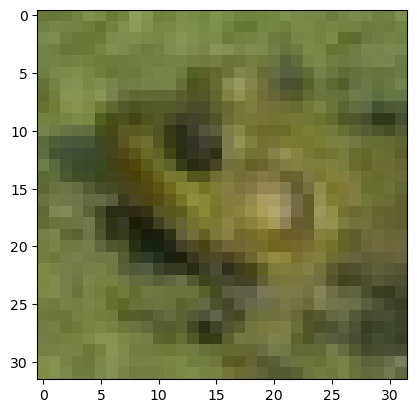

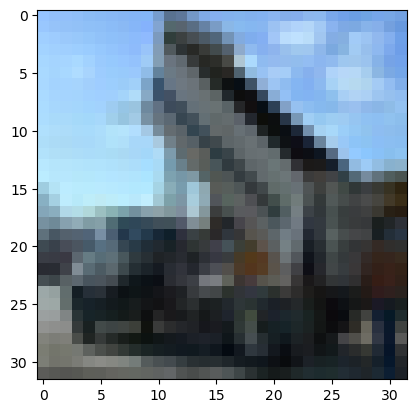

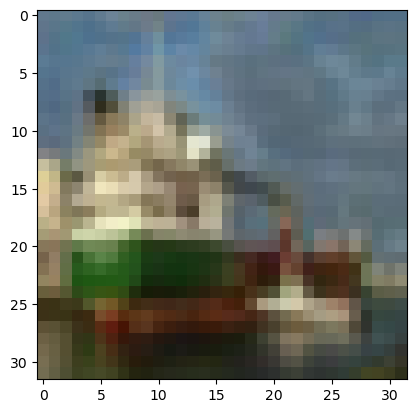

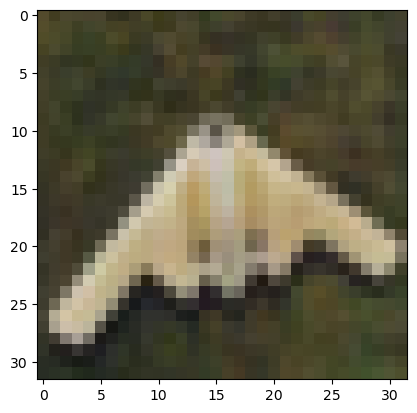

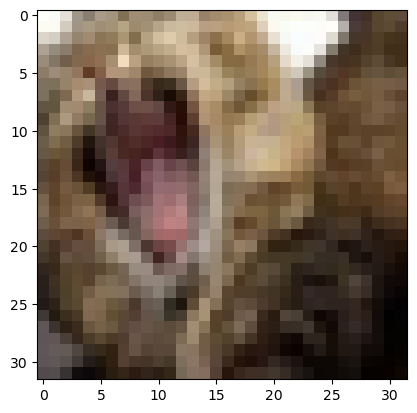

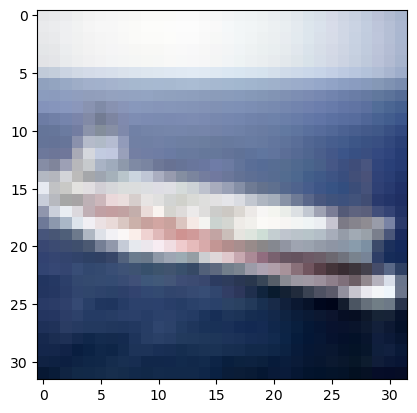

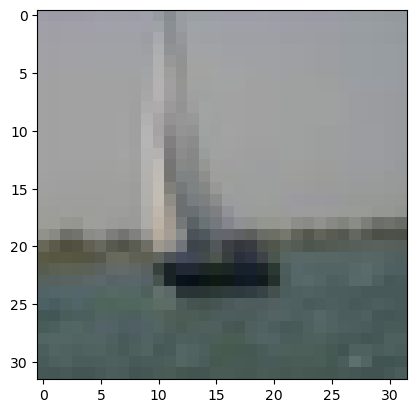

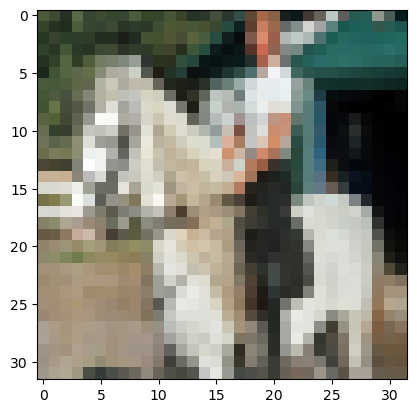

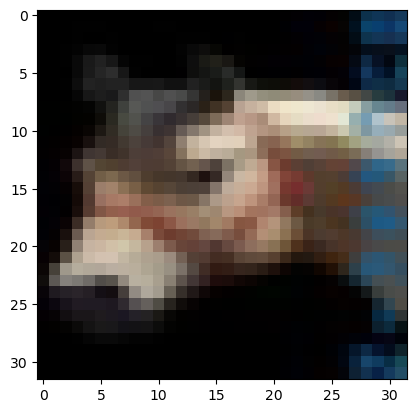

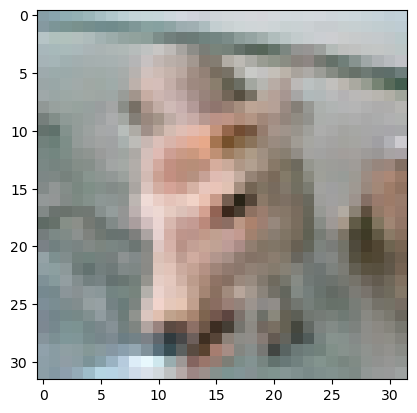

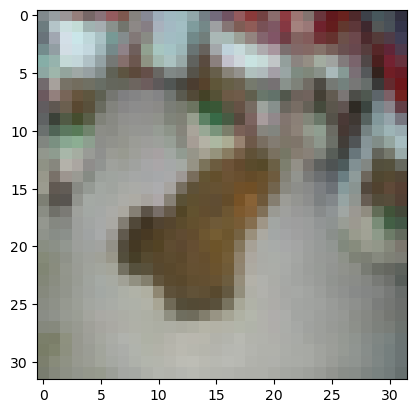

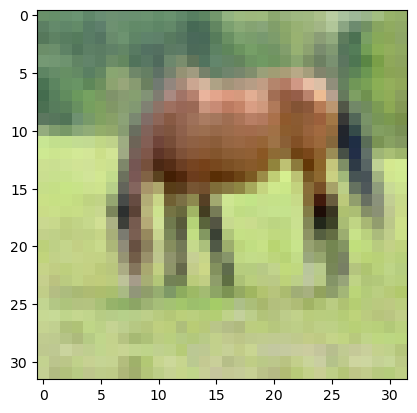

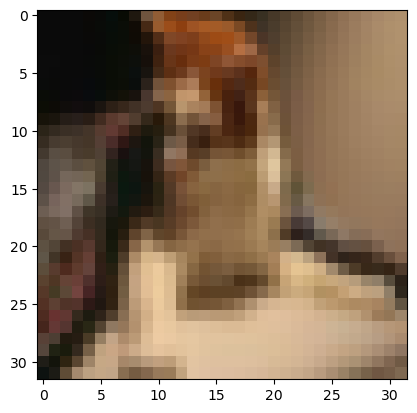

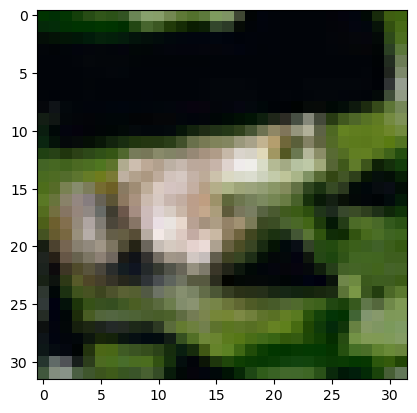

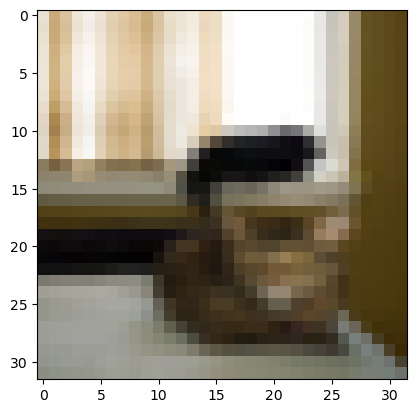

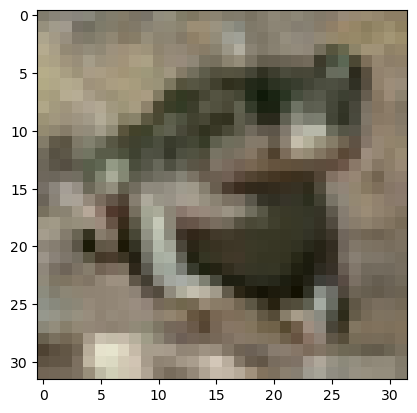

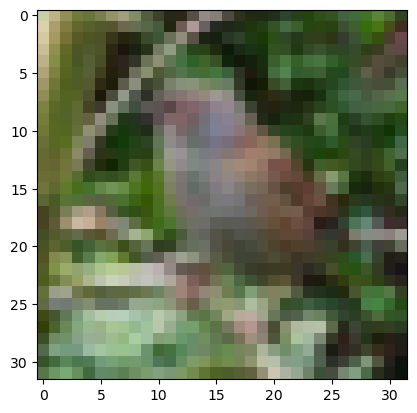

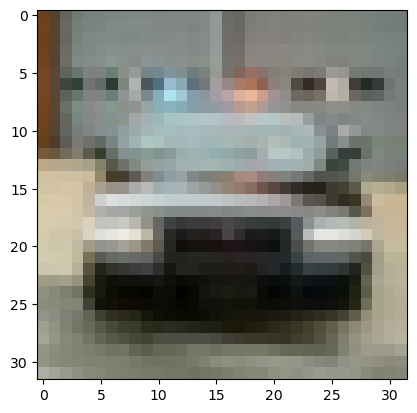

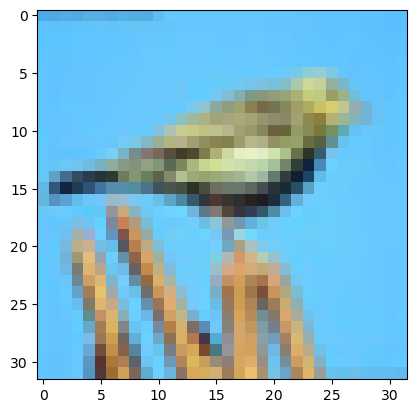

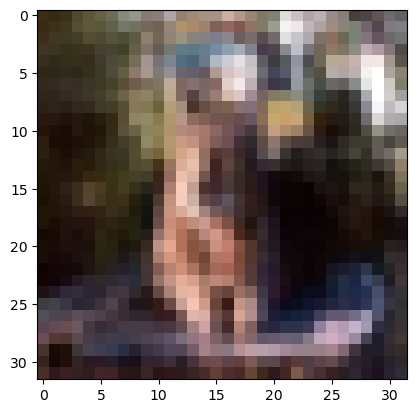

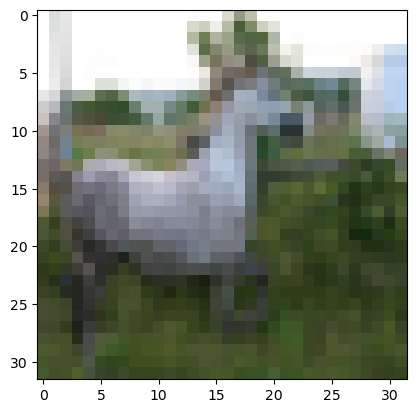

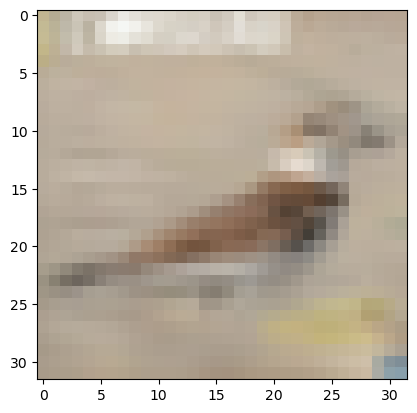

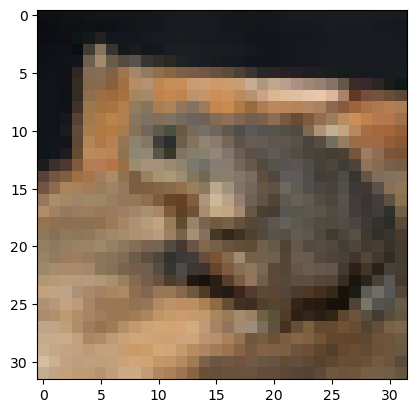

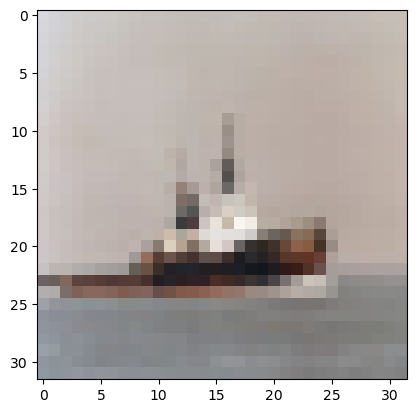

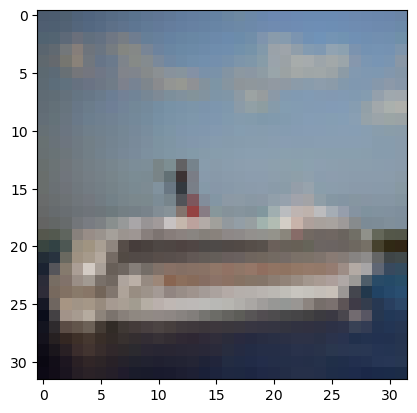

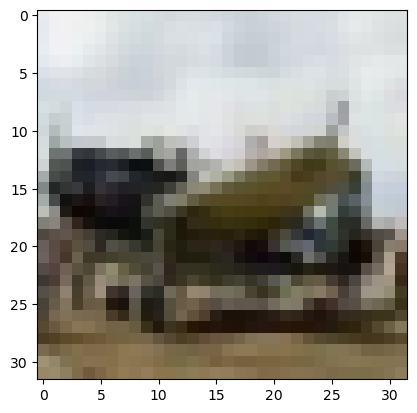

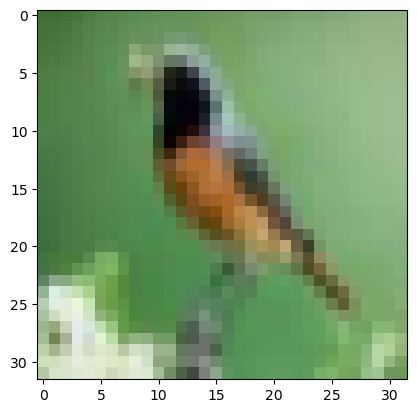

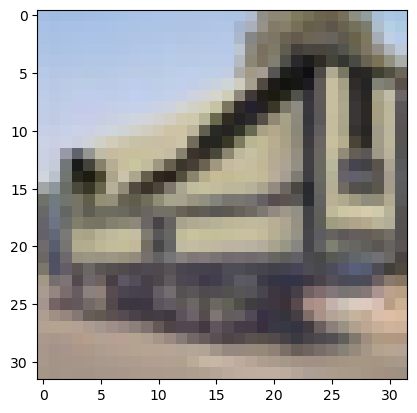

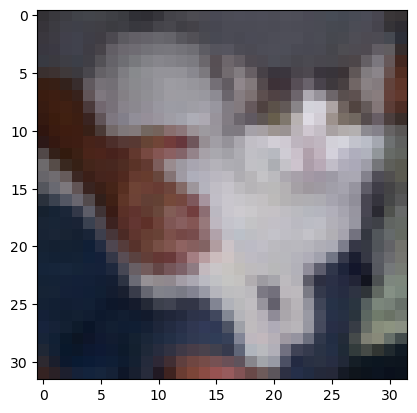

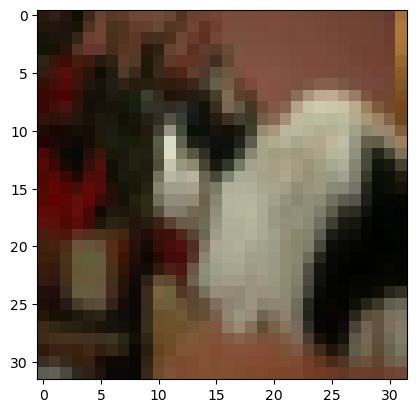

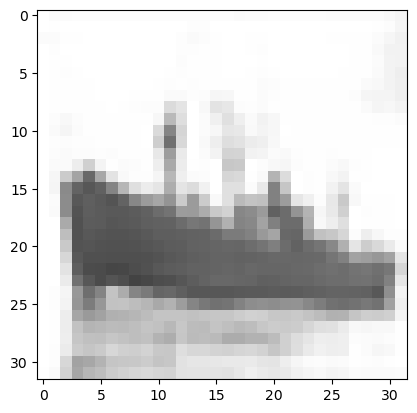

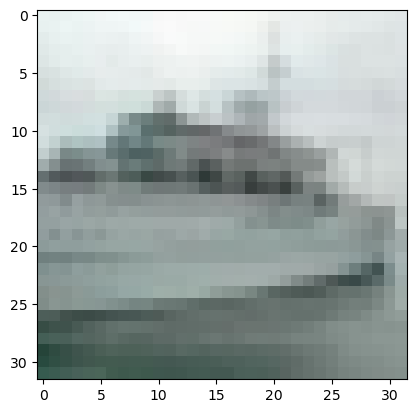

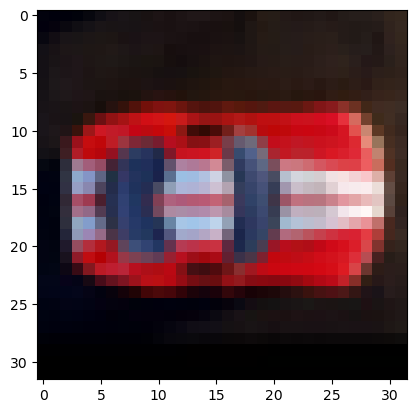

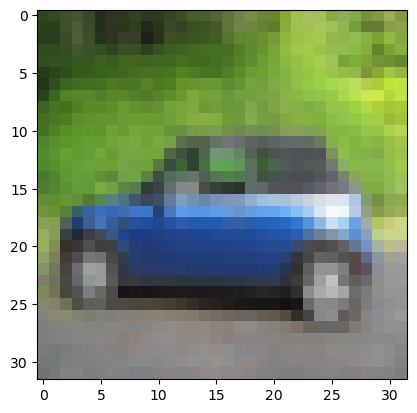

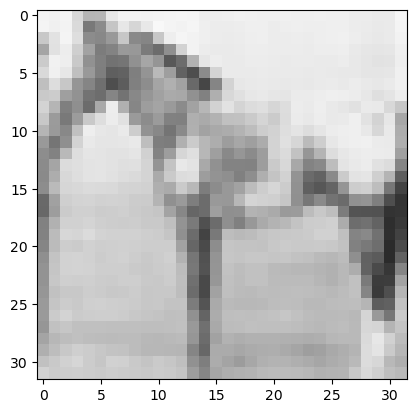

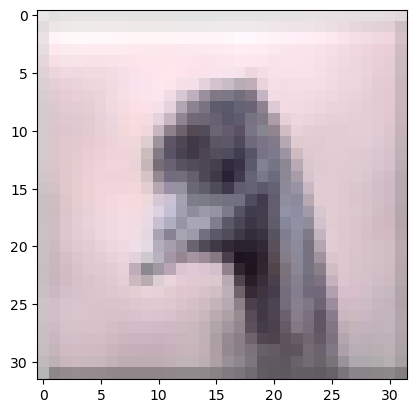

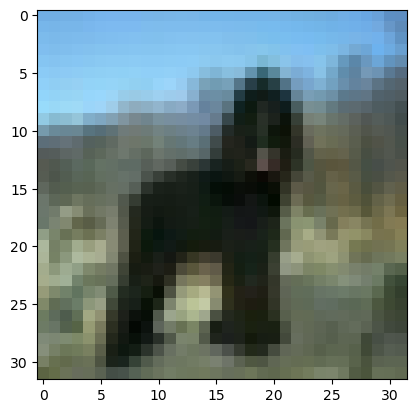

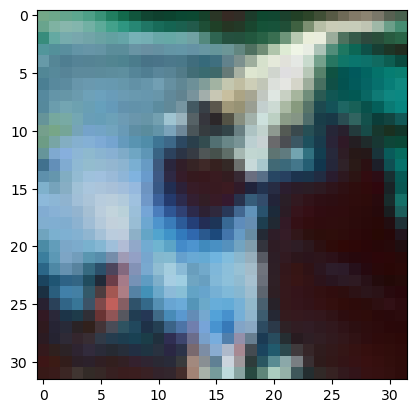

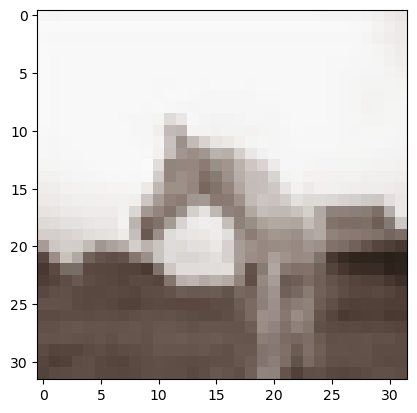


KeyboardInterrupt



In [34]:
# visualising the data 

for index in range(len(x_test)):
    
    img_size = 32

    img_array = x_test[index] # reads the image at the path joined by path + img 
    new_array = cv2.resize(img_array,(img_size,img_size))
    plt.imshow(new_array)
    plt.show()
    
    # training_data.append([new_array,class_num])
    

In [4]:
# # Reshaping the train and test data
# img_size_check = 32

# x_train = np.array(x_train).reshape(-1,img_size_check,img_size_check,3) # (no fo images , x , y , gray = 1 || rgb = 3)

# print(x_train[0].shape)
# print(x_train[0])

# x_test = np.array(x_test).reshape(-1,img_size_check,img_size_check,3)

# print(x_test[0].shape)
# print(x_test[0])



In [35]:
# Normalising the data

x_train =  tf.keras.utils.normalize(x_train , axis = 1)
print(x_train[0].shape)
print(x_train[0])

x_test =  tf.keras.utils.normalize(x_test , axis = 1)


(32, 32, 3)
[[[0.07182773 0.09722503 0.15002467]
  [0.05555073 0.08510671 0.1680591 ]
  [0.06416572 0.08557414 0.15041218]
  ...
  [0.19738931 0.2065452  0.30386149]
  [0.20651145 0.21914754 0.33373633]
  [0.20868805 0.22118572 0.32022806]]

 [[0.01947871 0.03136291 0.04762688]
  [0.         0.         0.        ]
  [0.02309966 0.01426236 0.        ]
  ...
  [0.15366383 0.1376968  0.15474428]
  [0.16167672 0.14551397 0.16359624]
  [0.17202664 0.15518676 0.17721359]]

 [[0.03043548 0.0376355  0.05000822]
  [0.02067004 0.01295102 0.        ]
  [0.0628824  0.04813545 0.02798366]
  ...
  [0.14741733 0.13143786 0.14067662]
  [0.16303535 0.14726715 0.16359624]
  [0.15369593 0.13021418 0.13057843]]

 ...

 [[0.25322319 0.26658477 0.22860901]
  [0.25966738 0.28307232 0.12697798]
  [0.25409624 0.28702993 0.0909469 ]
  ...
  [0.19988791 0.20810994 0.19694726]
  [0.07608316 0.05434859 0.02290347]
  [0.07473288 0.0606477  0.06218021]]

 [[0.21913545 0.21797225 0.22860901]
  [0.22349481 0.22756794 

In [5]:
# Save our data -> use pickle ( for safety -> to use later ) 
import pickle

pickle_out = open("x_train.pickle","wb")
pickle.dump(x_train , pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train , pickle_out)
pickle_out.close()



In [6]:
pickle_in = open("x_train.pickle","rb")
x_train_new = pickle.load(pickle_in)

print(x_train_new[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [57]:
# # The datasets are normalised and resized to the crt size

# # Implement the model now !

# # We are using CNN over ANN to reduce computations and to identify features quickly 


# # NAME = "Cats-vs-dog-64x2-with_dense{}".format(int(time.time()))


# # No of layers , node per layer , conv layer 

# dense_layers = [0,1,2]
# layer_sizes = [800,1000,1200]
# conv_layers = [1,2,3]


# for dense_layer in dense_layers :
#     for layer_size in layer_sizes :
#         for conv_layer in conv_layers :
#             NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
#             # print(NAME)
#             tb_callback= TensorBoard(log_dir="multiple_models_testing_more_neurons/{}".format(NAME)) # name of each model 

#             model = Sequential()
            
            
#             # layer 1 : Conv and pooling 
#             # arguments = (no of filters , window size ,activation)

#             # first conv layer need to have the input shape 
#             model.add ( Conv2D(layer_size,(3,3),input_shape = x_train.shape[1:],activation = "relu") ) # we skip the (-1) in the x_shape
#             model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

#             for l in range(conv_layer-1): # no input shape reqd -> so (-1 in the iteration ) 
#                 model.add ( Conv2D(layer_size,(3,3),activation = "relu") ) # we skip the (-1) in the x_shape
#                 model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

#             # Flatten before passing through the dense layer 
#             model.add(Flatten()) # convert to 1D
            
#             for l in range(dense_layer):
#                  # layer 2 : Hidden layers 
#                 model.add(Dense(units = layer_size,activation = "relu"))
            
            
#             # layer 3 : output layer 
#             model.add(Dense(units = 10,activation = "sigmoid"))

#             #Its binary so use binary loss
#             model.compile(
#                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),    
#                 optimizer=tf.keras.optimizers.Adam(0.001),metrics =["accuracy"], # Metric is what we want to measure 
#             )
            
#             x_train = np.array(x_train)
#             y_train = np.array(y_train)
            
#             # fit it
#             # Validation split is to choose the validation set and run our models and pick the best one -> CV set 
            
#             # Analysing the model -> using tensorflow 
#             model.fit(x_train,y_train,batch_size = 64,validation_split = 0.2,epochs = 8,callbacks = [tb_callback]) # send the input in batch size 


In [61]:
# # The datasets are normalised and resized to the crt size

# # Implement the model now !

# # We are using CNN over ANN to reduce computations and to identify features quickly 


# # NAME = "Cats-vs-dog-64x2-with_dense{}".format(int(time.time()))


# # No of layers , node per layer , conv layer 

# dense_layers = [3]
# layer_sizes = [1000]
# conv_layers = [2]
# conv_layer_size = 64


# for dense_layer in dense_layers :
#     for layer_size in layer_sizes :
#         for conv_layer in conv_layers :
#             NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
#             # print(NAME)
#             tb_callback= TensorBoard(log_dir="final_model/{}".format(NAME)) # name of each model 

#             model = Sequential()
            
            
#             # layer 1 : Conv and pooling 
#             # arguments = (no of filters , window size ,activation)

#             # first conv layer need to have the input shape 
#             model.add ( Conv2D(conv_layer_size,(3,3),input_shape = x_train.shape[1:],activation = "relu") ) # we skip the (-1) in the x_shape
#             model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

#             for l in range(conv_layer-1): # no input shape reqd -> so (-1 in the iteration ) 
#                 model.add ( Conv2D(conv_layer_size,(3,3),activation = "relu") ) # we skip the (-1) in the x_shape
#                 model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

#             # Flatten before passing through the dense layer 
#             model.add(Flatten(input_shape = (32,32,3))) # convert to 1D
            
#             for l in range(dense_layer):
#                  # layer 2 : Hidden layers 
#                 model.add(Dense(units = layer_size,activation = "relu"))
            
            
#             # layer 3 : output layer 
#             model.add(Dense(units = 10,activation = "softmax"))

#             #Its binary so use binary loss
#             model.compile(
#                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),    
#                 optimizer=tf.keras.optimizers.Adam(0.001),metrics =["accuracy"], # Metric is what we want to measure 
#             )
            
#             x_train = np.array(x_train)
#             y_train = np.array(y_train)
            
#             # fit it
#             # Validation split is to choose the validation set and run our models and pick the best one -> CV set 
            
#             # Analysing the model -> using tensorflow 
#             model.fit(x_train,y_train,batch_size = 64,validation_split = 0.2,epochs = 8,callbacks = [tb_callback]) # send the input in batch size 


Epoch 1/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.2800 - loss: 1.9131 - val_accuracy: 0.4615 - val_loss: 1.4959
Epoch 2/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5378 - loss: 1.2891 - val_accuracy: 0.5473 - val_loss: 1.2970
Epoch 3/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6303 - loss: 1.0547 - val_accuracy: 0.6296 - val_loss: 1.0503
Epoch 4/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6945 - loss: 0.8768 - val_accuracy: 0.6502 - val_loss: 1.0159
Epoch 5/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7425 - loss: 0.7286 - val_accuracy: 0.6590 - val_loss: 0.9924
Epoch 6/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7976 - loss: 0.5787 - val_accuracy: 0.6639 - val_loss: 1.0674
Epoch 7/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8411 - loss: 0.4578 - val_accuracy: 0.6517 - val_loss: 1.1566
Epoch 8/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8800 - loss: 0.3430 - val_accu

In [9]:


NAME = "Final_model"
# print(NAME)
tb_callback= TensorBoard(log_dir="final_model_conv_layer=3/{}".format(NAME)) # name of each model 

model = tf.keras.models.Sequential()

conv_layer = 3

# first conv layer need to have the input shape 
model.add ( Conv2D(64,(3,3),input_shape = x_train.shape[1:],activation = "relu") ) # we skip the (-1) in the x_shape
model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

for l in range(conv_layer-1): # no input shape reqd -> so (-1 in the iteration ) 
    model.add ( Conv2D(64,(3,3),activation = "relu") ) # we skip the (-1) in the x_shape
    model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

model.add(tf.keras.layers.Flatten(input_shape = (32,32,3))) # transforms 28 x 28 array into a one-dimensional array -> do it before adding the dense layer 

model.add(Dense(3000 , activation = "relu"))
model.add(Dense(1000 , activation = "relu"))

# we need prob -> so use softmax  -> we use linear to get better accuracy and change to softmax later 
model.add(Dense(10 , activation = "linear")) # output layer -> units = no of classification 



model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),metrics =["accuracy"], # Metric is what we want to measure 
)


model.fit(x_train,y_train,batch_size = 64,validation_split = 0.2,epochs = 10,callbacks = [tb_callback])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.2565 - loss: 2.7460 - val_accuracy: 0.4486 - val_loss: 1.5179
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.4905 - loss: 1.4189 - val_accuracy: 0.5290 - val_loss: 1.3306
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.5563 - loss: 1.2522 - val_accuracy: 0.5845 - val_loss: 1.1825
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6033 - loss: 1.1148 - val_accuracy: 0.5961 - val_loss: 1.1517
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6466 - loss: 0.9968 - val_accuracy: 0.6064 - val_loss: 1.1355
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6837 - loss: 0.8970 - val_accuracy: 0.6258 - val_loss: 1.0924
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7096 - loss: 0.8177 - val_accuracy: 0.6414 - val_loss: 1.1040
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7387 - loss: 0.7364 - 

In [10]:
# x_test = np.array(x_test)
# # x_test =  tf.keras.utils.normalize(x_test , axis = 1)

# predictions = model.predict(x_test)

# print(prediction[0])

z_values = model.predict(x_test)
print(z_values)
print(z_values.shape)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[ -5.326173    -1.5568988   -1.5924592  ...  -0.07633123  -3.5942655
   -0.892434  ]
 [  3.6859698   11.769743    -8.365919   ...  -8.586002     7.944792
    3.7471833 ]
 [  1.1512134    1.8116895   -1.5182166  ...  -1.1175909    1.9367601
    1.1568326 ]
 ...
 [-15.603727   -17.332327     5.514104   ...   5.9542227  -10.382673
   -7.055846  ]
 [  1.060786    11.826176    -2.4662836  ...  -3.4866502   -2.1739144
    0.78091943]
 [-10.301883   -14.847967    -9.606355   ...  20.34207     -6.925313
  -16.689203  ]]
(10000, 10)


In [11]:

prob_values = tf.nn.softmax(z_values).numpy() # to just get rid of tf.Tensor while printing 

# print(prob_values.shape)
# print(prob_values[:10])

prob_values = np.array(prob_values)

print(prob_values.shape)
print(prob_values[:10])



(10000, 10)
[[6.38135825e-05 2.76622782e-03 2.66958750e-03 5.67435086e-01
  2.65307236e-03 3.86642963e-01 1.98737551e-02 1.21587897e-02
  3.60637438e-04 5.37602650e-03]
 [3.01729218e-04 9.78036821e-01 1.76014436e-09 4.42030000e-07
  8.28529967e-10 4.84151421e-08 1.31593394e-08 1.41243151e-09
  2.13402752e-02 3.20775842e-04]
 [1.49024263e-01 2.88468271e-01 1.03261471e-02 3.38110216e-02
  5.97581081e-03 1.72015298e-02 3.01398733e-03 1.54144447e-02
  3.26900482e-01 1.49864003e-01]
 [9.14492428e-01 6.39178511e-03 1.57593004e-03 1.65899820e-03
  3.83937848e-03 6.37970516e-05 1.67832681e-04 4.00784411e-05
  6.10291138e-02 1.07408101e-02]
 [7.53840781e-04 7.01593308e-05 3.78298610e-01 4.20720987e-02
  2.77712226e-01 3.75890196e-03 2.94934750e-01 1.90999149e-03
  6.30096474e-05 4.26472834e-04]
 [1.93011010e-06 8.35294341e-05 1.71046719e-04 9.18662548e-03
  1.32788438e-04 2.10666112e-04 9.90193784e-01 4.56609405e-06
  6.15611089e-06 8.91506534e-06]
 [1.16036898e-02 1.96217209e-01 6.80779815e-02

In [18]:
outcomes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

print(outcomes[np.argmax(prob_values[0])])
print(outcomes[int(y_test[0])])

cat
cat


/tmp/ipykernel_3181/492081421.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(outcomes[int(y_test[0])])


In [19]:
val_loss , val_acc = model.evaluate(x_test,y_test)
print(f"Accuracy is {val_acc*100}%")
print(f"Loss is {val_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6262 - loss: 1.2609
Accuracy is 62.83000111579895%
Loss is 1.2592504024505615
